In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from textblob import TextBlob
import collections
## for text processing

import re
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
from nltk.corpus import stopwords, wordnet
# this function return the part of speech of a word.
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
from string import punctuation
# making list stopwords for removing stopwords from our text 
stop = set(stopwords.words('english'))
stop.update(punctuation)
print(stop)

{'not', "don't", 'she', 'and', 'itself', '$', 'couldn', 'having', 'if', 'had', 'hers', 'myself', 'that', '=', 'was', 'in', 'have', 'again', 'at', "won't", ';', 'haven', 'out', "'", 'ma', 'needn', 'when', 'no', 'll', 'do', "haven't", 'by', 'any', 'the', 'down', 'is', 't', 'under', 'during', 'same', 'doing', "shouldn't", 'shan', '{', '&', 'a', 'i', 'what', 'm', "couldn't", 'it', 'whom', 'above', 'herself', 'then', 'can', "mightn't", '+', 'about', 'himself', 'between', 'which', "that'll", "doesn't", 'yourself', "hasn't", '[', 'nor', 'are', 'how', 'both', 'few', 'than', 'or', 'with', 'from', '%', 'so', "didn't", 'does', "wasn't", 'against', 'below', 'too', "hadn't", 'wouldn', 'once', 'we', "shan't", 'you', 'only', "should've", 'each', 'our', '/', 'to', 'while', "you'll", 'him', 'just', 's', 'being', '-', '?', 'on', 'did', 'they', ')', ',', ']', 'don', '}', "wouldn't", 'will', "weren't", 'ours', "you've", 'yours', '.', 'hasn', 'off', 'all', 'should', 'where', '_', 'other', '(', "aren't", 'm

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk import pos_tag
# Function to clean our text.
lemmatizer = WordNetLemmatizer()
def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)

In [ ]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, lst_stopwords=None, flg_stemm=False, flg_lemm=True):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    return text

In [ ]:
#Loading .txt

df = pd.read_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/Sentences_50Agree.txt', encoding = "ISO-8859-1",header=None,sep='.@')
df = df.rename(columns={0: 'News', 1: 'Sentiment'})

df1 = pd.read_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/Sentences_66Agree.txt', encoding = "ISO-8859-1",header=None,sep='.@')
df1 = df1.rename(columns={0: 'News', 1: 'Sentiment'})

df2 = pd.read_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/Sentences_75Agree.txt', encoding = "ISO-8859-1",header=None,sep='.@')
df2 = df2.rename(columns={0: 'News', 1: 'Sentiment'})

df3 = pd.read_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/Sentences_AllAgree.txt', encoding = "ISO-8859-1",header=None,sep='.@')
df3 = df3.rename(columns={0: 'News', 1: 'Sentiment'})


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
df.News = df.News.apply(clean_review)
df.News = df.News.apply(join_text)

In [ ]:
df.head(25)

,Sentiment,News
0,neutral,accord gran company plan move production russi...
1,neutral,technopolis plan develop stage area less 10000...
2,negative,international electronic industry company elco...
3,positive,new production plant company would increase ca...
4,positive,accord company update strategy year 20092012 b...
5,positive,financing aspocomp growth aspocomp aggressivel...
6,positive,last quarter 2010 componenta net sale double e...
7,positive,third quarter 2010 net sale increase 52 eur 20...
8,positive,operating profit rise eur 131 mn eur 87 mn cor...
9,positive,operating profit total eur 211 mn eur 186 mn 2...


In [ ]:
#Pre processing 

df["text_clean"] = df["News"].apply(lambda x: utils_preprocess_text(x,  lst_stopwords, flg_stemm=False, flg_lemm=True,))
del df['News']
df = df.rename(columns={'text_clean': 'News'})

df1["text_clean"] = df1["News"].apply(lambda x: utils_preprocess_text(x,  lst_stopwords, flg_stemm=False, flg_lemm=True,))
del df1['News']
df1 = df1.rename(columns={'text_clean': 'News'})

df2["text_clean"] = df2["News"].apply(lambda x: utils_preprocess_text(x,  lst_stopwords, flg_stemm=False, flg_lemm=True,))
del df2['News']
df2 = df2.rename(columns={'text_clean': 'News'})

df3["text_clean"] = df3["News"].apply(lambda x: utils_preprocess_text(x,  lst_stopwords, flg_stemm=False, flg_lemm=True,))
del df3['News']
df3 = df3.rename(columns={'text_clean': 'News'})


In [ ]:
df.head(50)

,Sentiment,News
0,neutral,according to gran the company has no plans to...
1,neutral,technopolis plans to develop in stages an area...
2,negative,the international electronic industry company ...
3,positive,with the new production plant the company woul...
4,positive,according to the company s updated strategy fo...
5,positive,financing of aspocomp s growth aspocomp is agg...
6,positive,for the last quarter of 2010 componenta s net...
7,positive,in the third quarter of 2010 net sales increa...
8,positive,operating profit rose to eur 131 mn from eur 8...
9,positive,operating profit totalled eur 211 mn up from ...


In [ ]:
df3.head()

,Sentiment,News
0,neutral,according gran company plan move production ru...
1,positive,last quarter 2010 componenta net sale doubled ...
2,positive,third quarter 2010 net sale increased 52 eur 2...
3,positive,operating profit rose eur 131 mn eur 87 mn cor...
4,positive,operating profit totalled eur 211 mn eur 186 m...


In [ ]:
#save datasets processed

df.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/Sentences_50Agree_processed.txt', index=False)
df1.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/Sentences_66Agree_processed.txt', index=False)
df2.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/Sentences_75Agree_processed.txt', index=False)
df3.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/Sentences_AllAgree_processed.txt', index=False)

In [ ]:
# take 30% out of the data as test
test = df.sample(frac = 0.3)

In [ ]:
test.head()

,Sentiment,News
522,neutral,order consists capacity expansion maintenance ...
1553,neutral,area highly valued land already built
4583,neutral,operating profit sixmonth period decreased eur...
4232,neutral,sanoma announced stock option scheme 2008 19 d...
1871,neutral,total scholarship amount 40000 euro recipient ...


In [ ]:
test.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set.txt', index=False)

In [ ]:
test = test[test["Sentiment"] != "neutral"]

In [ ]:
test.head()

,Sentiment,News
878,positive,recovery evident liquid handling business part...
286,positive,aim increase sale least one fifth 2006
2494,positive,ixonos estimate hire 20 specialist mechanical ...
2055,positive,subdivision made sale revenue last year eur 48...
2810,negative,result company temporarily layoff 25 whole per...


In [ ]:
test.head()

,Sentiment,News
878,positive,recovery evident liquid handling business part...
286,positive,aim increase sale least one fifth 2006
2494,positive,ixonos estimate hire 20 specialist mechanical ...
2055,positive,subdivision made sale revenue last year eur 48...
2810,negative,result company temporarily layoff 25 whole per...


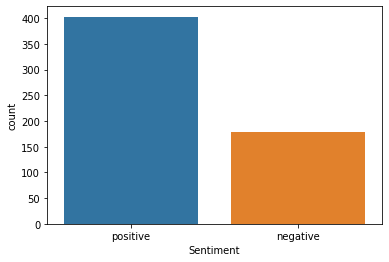

In [ ]:
import seaborn as sns

sns.countplot(x='Sentiment', data=test)

In [ ]:
test.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt', index=False)

In [ ]:
#function to remove test from other datasets

def remove_test_data(df1, df2):
  # find elements in df1 that are not in df2
  df_1notin2 = df1[~(df1['Sentiment'].isin(df2['Sentiment']) & df1['News'].isin(df2['News']))].reset_index(drop=True)
  return df_1notin2

In [ ]:
without_test_50Agree = remove_test_data(df, test)
without_test_66Agree = remove_test_data(df1, test)
without_test_75Agree = remove_test_data(df2, test)
without_test_AllAgree = remove_test_data(df3, test)

In [ ]:
#results 

print(without_test_50Agree.shape)
print(without_test_66Agree.shape)
print(without_test_75Agree.shape)
print(without_test_AllAgree.shape)

(4264, 2)
(3723, 2)
(3061, 2)
(2008, 2)


In [ ]:
#save datasets for classification

without_test_50Agree.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_50Agree.txt', index=False)
without_test_66Agree.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_66Agree.txt', index=False)
without_test_75Agree.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_75Agree.txt', index=False)
without_test_AllAgree.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_AllAgree.txt', index=False)

In [ ]:
#Prepare data for binary classification

without_test_50Agree_binary = pd.read_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_50Agree.txt', encoding = "ISO-8859-1",names = ["Sentiment", "News"],header=None, sep=',')
without_test_66Agree_binary = pd.read_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_66Agree.txt', encoding = "ISO-8859-1",names = ["Sentiment", "News"],header=None, sep=',')
without_test_75Agree_binary = pd.read_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_75Agree.txt', encoding = "ISO-8859-1",names = ["Sentiment", "News"],header=None, sep=',')
without_test_AllAgree_binary = pd.read_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_AllAgree.txt', encoding = "ISO-8859-1",names = ["Sentiment", "News"],header=None, sep=',')

In [ ]:
without_test_50Agree_binary.head()

,Sentiment,News
0,Sentiment,News
1,neutral,according gran company plan move production ru...
2,neutral,technopolis plan develop stage area le 100000 ...
3,negative,international electronic industry company elco...
4,positive,new production plant company would increase ca...


In [ ]:
without_test_50Agree_binary = without_test_50Agree_binary[without_test_50Agree_binary["Sentiment"] != "neutral"]
without_test_66Agree_binary = without_test_66Agree_binary[without_test_66Agree_binary["Sentiment"] != "neutral"]
without_test_75Agree_binary = without_test_75Agree_binary[without_test_75Agree_binary["Sentiment"] != "neutral"]
without_test_AllAgree_binary = without_test_AllAgree_binary[without_test_AllAgree_binary["Sentiment"] != "neutral"]

In [ ]:
print(without_test_50Agree_binary.shape)
print(without_test_66Agree_binary.shape)
print(without_test_75Agree_binary.shape)
print(without_test_AllAgree_binary.shape)

(1386, 2)
(1189, 2)
(916, 2)
(618, 2)


In [ ]:
#save datasets for binary classification

without_test_50Agree_binary.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_50Agree_binary.txt', index=False)
without_test_66Agree_binary.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_66Agree_binary.txt', index=False)
without_test_75Agree_binary.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_75Agree_binary.txt', index=False)
without_test_AllAgree_binary.to_csv('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_AllAgree_binary.txt', index=False)